# Einführung in die Programmierung für Studierende der Physik
# (Introduction to Programming for Physicists)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2022)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 01.04.2022

## Numerische Integration

Wir betrachten in diesem Jupyter Notebook die Methode der numerischen Integration mittels der "Geschlossenen Newton-Cotes Gleichungen" (closed Newton-Cotes formulars). Die Vorgehensweise der Herleitung dieser Gleichungen erfolgt, indem man die zu integrierende Funktion f(x) in ein Lagrange Polynom vom Grade N ($P_N(x)$) entwickelt und dann durch analytische Integration zur Approximationen gelangt, die für $N=1$ in die Trapez-Regel, für $N=2$ in die Simpson's-Regel und für $N=3$ in die Simpson's-3/8-Regel übergehen. 

Wir möchten das folgende bestimmte Integral numerisch approximieren:

$$
\begin{equation}
\int_a^b f(x) \, dx \approx \sum_{i=0}^N c_i \,f(x_i) \quad,
\end{equation}
$$
wobei man das Integrationsintervall in $N$ äquidistante Punkte unterteilt: $x_0=a$, $x_N=b$ und $x_i=a+i\cdot(b-a)/N=a+i\cdot h$ mit ($i=0,1,2,..,N$).

In [1]:
from sympy import *
init_printing()

Wir betrachten z.B. die Funktion $f(x)=10 \cdot {\rm sin}(x) \cdot e^{-\frac{x}{10}}$

In [2]:
x = Symbol('x')
f = 10*sin(x)*exp(-x/10)

Das unbestimmte Integral dieser Funktion hat die folgende analytische Lösung, mit der wir dann später unsere numerischen Approximationen vergleichen können.

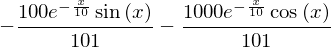

In [3]:
Integral_f=integrate(f,x)
Integral_f

Für das bestimmte Integral $\int_2^4 f(x) \, dx$ ergibt sich somit der folgende genaue Wert:

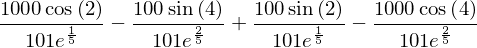

In [4]:
Integral_f_Wert=integrate(f,(x,2,4))
Integral_f_Wert

In [5]:
Integral_f_Wert.evalf()

In [6]:
f = Function('f')(x)

Im Folgenden wollen wir die jeweiligen Gleichungen mittels der Methode der Lagrange Polynome ($P_N(x)$) herleiten. Das N-te Lagrange Polynom $P_N(x)$ einer Funktion ist wie folgt definiert:

$$
\begin{equation}
P_N(x) = \sum_{k=0}^N f(x_k) \cdot L_{N,k}(x) \quad,
\end{equation}
$$

mit 

$$
\begin{equation}
L_{N,k}(x) = \prod_{i=0 , \, i \neq k}^N \frac{(x-x_i)}{(x_k-x_i)} \quad.
\end{equation}
$$

Setzt man das Lagrange Polynom $P_N(x)$ in das bestimmte Integral ein, erhält man:

$$
\begin{equation}
\int_a^b f(x) \, dx \approx  \int_a^b  \sum_{k=0}^N f(x_k) \cdot L_{N,k}(x) \, dx 
= \sum_{k=0}^N  f(x_k) \cdot \underbrace{\int_a^b L_{N,k}(x) \, dx}_{c_k} := \sum_{k=0}^N f(x_k) \, c_k  \quad.
\end{equation}
$$


### Die Trapez-Regel (N=1)
Die einfachste Approximation erhält man mittels eines linearen Lagrange Polynoms $P_1(x)$. Man benutzt dabei lediglich zwei Punkte, nämlich die Grenzen des Intervalls ($x_0=a$ und $x_1=b=x_0+h$ mit $h=(b-a)$). Man erhält in unserem Beispiel:

In [7]:
x0,x1 = symbols('x_0,x_1')
N=1
points=[x0,x1]
f_points=[f.subs(x,points[0]), f.subs(x,points[1])]

In [8]:
points, f_points

Mit den oben angegebenen zwei Punkten erhält man das folgende Lagrange Polynom $P_1(x)$:

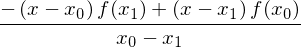

In [9]:
List_ranges=[]
for i in range(N+1):
    List_range=list(range(N+1))
    List_range.pop(i)
    List_ranges.append(List_range)
List_ranges
P_1=sum(f_points[k] * prod((x - points[i])/(points[k] - points[i])  for i in List_ranges[k]) for k in range(N+1))
P_1.simplify()

bzw. hier mittels zweier for-Schleifen:

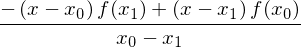

In [10]:
P_1=0
for k in range(N+1):
    prod=1
    for i in range(N+1):
        if i != k:
            prod=prod*(x - points[i])/(points[k] - points[i])
    P_1=P_1 + f_points[k] * prod
P_1.simplify()

Mit $P_1(x)$ berechnen wir uns nun das bestimmte Integral 

$$
\begin{equation}
\int_a^b f(x) \, dx \approx {\cal I}_1 :=  \int_{x_0}^{x_1}  \sum_{k=0}^1 f(x_k) \cdot L_{1,k}(x) \, dx 
= \int_{x_0}^{x_1}  \sum_{k=0}^1 f(x_k) \cdot \prod_{i=0 , \, i \neq k}^1 \frac{(x-x_i)}{(x_k-x_i)} \, dx
\end{equation}
$$

durch analytische Integration:

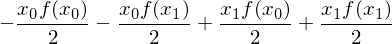

In [11]:
Integral_P1_Wert=integrate(P_1.simplify(),(x,x0,x1)) 
Integral_P1_Wert.simplify()

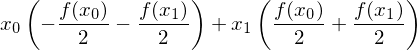

In [12]:
Integral_P1_Wert.simplify().collect(x0).collect(x1)

Man erhält somit die folgende Trapez-Regel: 

$$
\begin{equation}
{\cal I}_1 =  \frac{(x_1 - x_0)}{2} \cdot \left( f(x_0) +  f(x_1) \right) =  \frac{h}{2} \cdot \left( f(x_0) +  f(x_1) \right) \quad,
\end{equation}
$$
was man auch durch folgende Berechnungen sieht:

In [13]:
h = symbols('h')
N=1
points=[x0,x0+h]
f_points=[f.subs(x,points[0]), f.subs(x,points[1])]

In [14]:
f_points

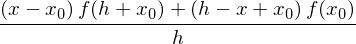

In [15]:
P_1=0
for k in range(N+1):
    prod=1
    for i in range(N+1):
        if i != k:
            prod=prod*(x - points[i])/(points[k] - points[i])
    P_1=P_1 + f_points[k] * prod
P_1.simplify()

Dieses lineare Lagrange Polynom können wir nun analytisch integrieren und man erhält:

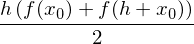

In [16]:
Integral_P1_Wert=integrate(P_1.simplify(),(x,x0,x0+h)) 
Integral_P1_Wert.simplify()

### Die Simpson's-Regel (N=2)
Die Simpson's Approximation erhält man mittels eines quadratischen Lagrange Polynoms $P_2(x)$. Man benutzt dabei drei Punkte, nämlich die Grenzen des Intervalls ($x_0=a$ und $x_2=b =a + 2h$) und einen Wert in der Mitte des Intervalls ($x_1=a + h$) mit $h=(b-a)/2$. Man erhält in unserem Beispiel:

In [17]:
x2 = symbols('x_2')
N=2
points=[x0,x0 + h,x0 + 2*h]
f_points=[f.subs(x,points[0]), f.subs(x,points[1]), f.subs(x,points[2])]

In [18]:
points, f_points

Mit den oben angegebenen drei Punkten erhält man das folgende Lagrange Polynom $P_2(x)$:

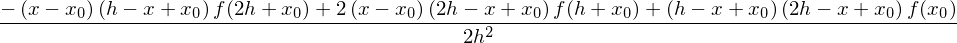

In [19]:
P_2=0
for k in range(N+1):
    prod=1
    for i in range(N+1):
        if i != k:
            prod=prod*(x - points[i])/(points[k] - points[i])
    P_2=P_2 + f_points[k] * prod
P_2.simplify()

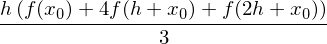

In [20]:
Integral_P2_Wert=integrate(P_2.simplify(),(x,x0,x0 + 2*h)) 
Integral_P2_Wert.simplify()

Man erhält somit die folgende Simpson's-Regel: 

$$
\begin{equation}
{\cal I}_2 =  \frac{h}{3} \cdot \left( f(x_0) +  4 f(x_1) +  f(x_2)  \right)
\end{equation}
$$

### Die Simpson's-3/8-Regel (N=3) 
Die Simpson's-3/8 Approximation erhält man mittels des Lagrange Polynoms $P_3(x)$. Man benutzt dabei vier Punkte, nämlich die Grenzen des Intervalls ($x_0=a$ und $x_3=b =a + 3h$) und zwei zusätzliche Werte ($x_1=a + h$ und $x_2=a + 2h$) mit $h=(b-a)/3$. Man erhält in unserem Beispiel:

In [21]:
x3 = symbols('x_3')
N=3
points=[x0,x0 + h,x0 + 2*h, x0 + 3*h]
f_points=[f.subs(x,points[0]), f.subs(x,points[1]), f.subs(x,points[2]), f.subs(x,points[3])]

In [22]:
points, f_points

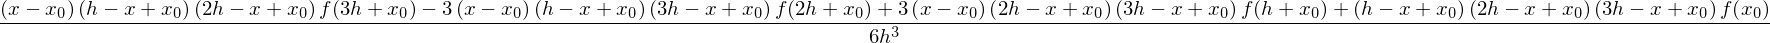

In [23]:
P_3=0
for k in range(N+1):
    prod=1
    for i in range(N+1):
        if i != k:
            prod=prod*(x - points[i])/(points[k] - points[i])
    P_3=P_3 + f_points[k] * prod
P_3.simplify()

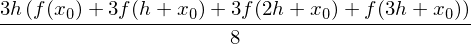

In [24]:
Integral_P3_Wert=integrate(P_3.simplify(),(x,x0,x0 + 3*h))
Integral_P3_Wert.simplify()

Man erhält somit die folgende  Simpson's-3/8-Regel: 

$$
\begin{equation}
{\cal I}_3 =  \frac{3 \, h}{8} \cdot \left( f(x_0) + 3 f(x_1) + 3 f(x_2) +  f(x_3) \right)
\end{equation}
$$

### Die N=4 Regel
Die $N=4$ Approximation erhält man mittels des Lagrange Polynoms $P_4(x)$. Man benutzt dabei fünf Punkte, nämlich die Grenzen des Intervalls ($x_0=a$ und $x_4=b =a + 4h$) und zwei zusätzliche Werte ($x_1=a + h$, $x_2=a + 2h$ und $x_3=a + 3h$) mit $h=(b-a)/4$. Man erhält in unserem Beispiel:

In [25]:
x4 = symbols('x_4')
N=4
points=[x0,x0 + h,x0 + 2*h, x0 + 3*h, x0 + 4*h]
f_points=[f.subs(x,points[0]), f.subs(x,points[1]), f.subs(x,points[2]), f.subs(x,points[3]), f.subs(x,points[4])]

In [26]:
points, f_points

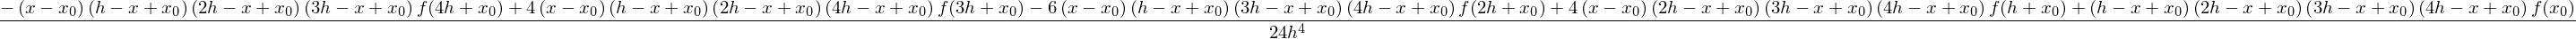

In [27]:
P_4=0
for k in range(N+1):
    prod=1
    for i in range(N+1):
        if i != k:
            prod=prod*(x - points[i])/(points[k] - points[i])
    P_4=P_4 + f_points[k] * prod
P_4.simplify()

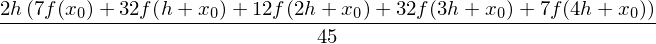

In [28]:
Integral_P4_Wert=integrate(P_4.simplify(),(x,x0,x0 + 4*h))
Integral_P4_Wert.simplify()

Man erhält somit die folgende $N=4$-Regel: 

$$
\begin{equation}
{\cal I}_4 =  \frac{2 \, h}{45} \cdot \left( 7 f(x_0) + 32 f(x_1) + 12 f(x_2) +  32 f(x_3) + 7 f(x_4) \right)
\end{equation}
$$

### Beispiel 
Wir betrachten z.B. die Funktion $f(x)=10 \cdot {\rm sin}(x) \cdot e^{-\frac{x}{10}}$ und approximieren den Wert für das bestimmte Integral $\int_2^4 f(x) \, dx$. Wir benutzen z.B. die Simpson's Regel (N=2) und approximieren die Funktion f(x) mittels des quadratischen Lagrange Polynoms $P_2(x)$.

In [29]:
f = 10*sin(x)*exp(-x/10)
N=2
a=2
b=4
x0=a
h=(b-a)/N
points=[x0,x0 + h,x0 + 2*h]
f_points=[f.subs(x,points[0]), f.subs(x,points[1]), f.subs(x,points[2])]

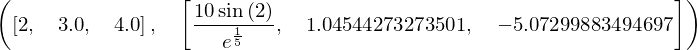

In [30]:
points, f_points

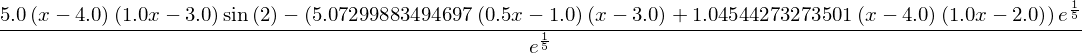

In [31]:
P_2=0
for k in range(N+1):
    prod=1
    for i in range(N+1):
        if i != k:
            prod=prod*(x - points[i])/(points[k] - points[i])
    P_2=P_2 + f_points[k] * prod
P_2.simplify()

In [32]:
Integral_P2_Wert=integrate(P_2.simplify(),(x,a,b))
Integral_P2_Wert.evalf()

In [33]:
P2_points=points
P2_f_points=f_points
P2_Iwert=Integral_P2_Wert.evalf()
P2_LP=lambdify(x, P_2.evalf().simplify().subs(x,x))

Wir benutzen nun die (N=4)-Regel und approximieren die Funktion f(x) mittels des Lagrange Polynoms $P_4(x)$.

In [34]:
N=4
h=(b-a)/N
points=[x0,x0 + h,x0 + 2*h, x0 + 3*h, x0 + 4*h]
f_points=[f.subs(x,points[0]), f.subs(x,points[1]), f.subs(x,points[2]), f.subs(x,points[3]), f.subs(x,points[4])]

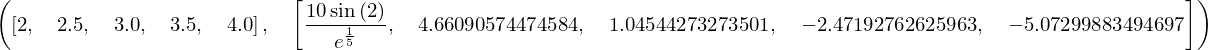

In [35]:
points, f_points

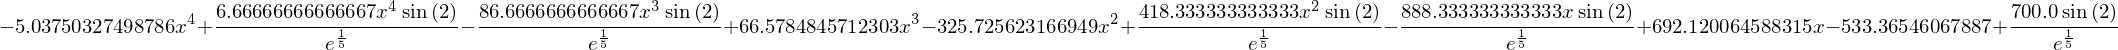

In [36]:
P_4=0
for k in range(N+1):
    prod=1
    for i in range(N+1):
        if i != k:
            prod=prod*(x - points[i])/(points[k] - points[i])
    P_4=P_4 + f_points[k] * prod
P_4.simplify()

In [37]:
Integral_P4_Wert=integrate(P_4.simplify(),(x,a,b))
Integral_P4_Wert.evalf()

In [38]:
P4_points=points
P4_f_points=f_points
P4_Iwert=Integral_P4_Wert.evalf()
P4_LP=lambdify(x, P_4.evalf().simplify().subs(x,x))

Für die Trapez-Regel (N=1) erhalten wir:

In [39]:
N=1
h=(b-a)/N
points=[x0,x0 + h]
f_points=[f.subs(x,points[0]), f.subs(x,points[1])]

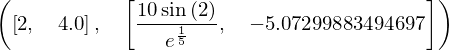

In [40]:
points, f_points

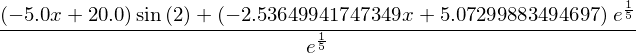

In [41]:
P_1=0
for k in range(N+1):
    prod=1
    for i in range(N+1):
        if i != k:
            prod=prod*(x - points[i])/(points[k] - points[i])
    P_1=P_1 + f_points[k] * prod
P_1.simplify()

In [42]:
Integral_P1_Wert=integrate(P_1.simplify(),(x,a,b))
Integral_P1_Wert.evalf()

In [43]:
P1_points=points
P1_f_points=f_points
P1_Iwert=Integral_P1_Wert.evalf()
P1_LP=lambdify(x, P_1.evalf().simplify().subs(x,x))

Für die Simpson's-3/8-Regel (N=3) erhalten wir:

In [44]:
N=3
h=(b-a)/N
points=[x0,x0 + h,x0 + 2*h, x0 + 3*h]
f_points=[f.subs(x,points[0]), f.subs(x,points[1]), f.subs(x,points[2]), f.subs(x,points[3])]

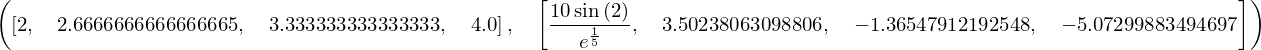

In [45]:
points, f_points

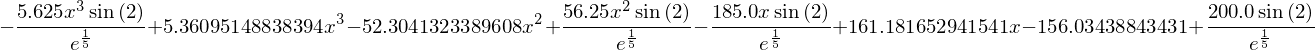

In [46]:
P_3=0
for k in range(N+1):
    prod=1
    for i in range(N+1):
        if i != k:
            prod=prod*(x - points[i])/(points[k] - points[i])
    P_3=P_3 + f_points[k] * prod
P_3.simplify()

In [47]:
Integral_P3_Wert=integrate(P_3.simplify(),(x,a,b))
Integral_P3_Wert.evalf()

In [48]:
P3_points=points
P3_f_points=f_points
P3_Iwert=Integral_P3_Wert.evalf()
P3_LP=lambdify(x, P_3.evalf().simplify().subs(x,x))

Wir veranschaulichen nun die unterschiedlichen Integrationsregeln.

In [49]:
import matplotlib                                                         
import matplotlib.pyplot as plt    
import numpy as np                 
import matplotlib.gridspec as gridspec  

In [50]:
params = {
    'figure.figsize'    : [14,10],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

In [51]:
eps=0.2
x_list = np.linspace(a-eps, b+eps, 1000)
x_list1 = np.linspace(a, b, 1000)
f_lam = lambdify(x, f.subs(x,x))

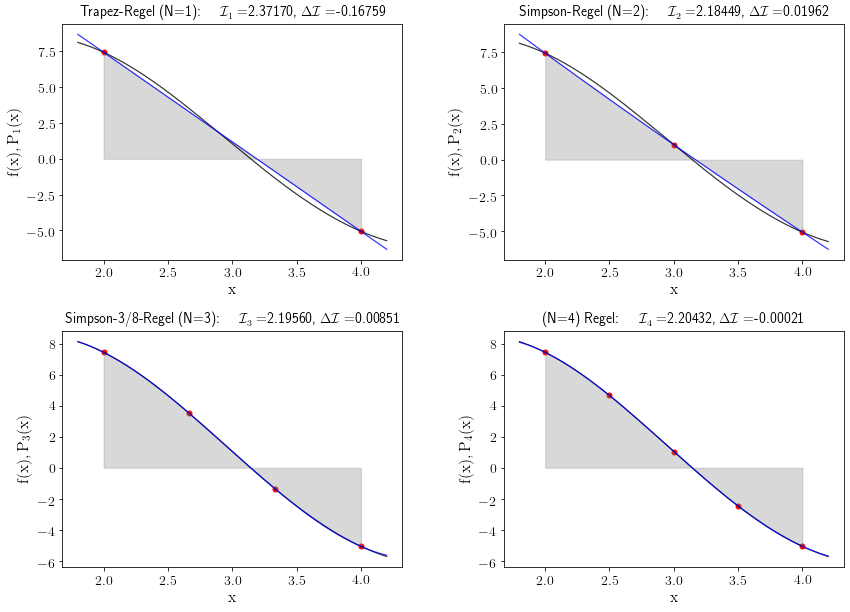

In [52]:
l_width=1.2 
alp=0.8
alp_area=0.3

fig = plt.figure()                                                        
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)  
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[3])


set_title1 = r'Trapez-Regel (N=1): $\quad {\cal I}_1=$'+'{0:.5f}'.format(P1_Iwert)+', $\Delta {\cal I}=$'+'{0:.5f}'.format(Integral_f_Wert.evalf()-P1_Iwert)
set_title2 = r'Simpson-Regel (N=2): $\quad {\cal I}_2=$'+'{0:.5f}'.format(P2_Iwert)+', $\Delta {\cal I}=$'+'{0:.5f}'.format(Integral_f_Wert.evalf()-P2_Iwert)
set_title3 = r'Simpson-3/8-Regel (N=3): $\quad {\cal I}_3=$'+'{0:.5f}'.format(P3_Iwert)+', $\Delta {\cal I}=$'+'{0:.5f}'.format(Integral_f_Wert.evalf()-P3_Iwert)
set_title4 = r'(N=4) Regel: $\quad {\cal I}_4=$'+'{0:.5f}'.format(P4_Iwert)+', $\Delta {\cal I}=$'+'{0:.5f}'.format(Integral_f_Wert.evalf()-P4_Iwert)

ax1.set_title(set_title1)
ax2.set_title(set_title2)
ax3.set_title(set_title3)
ax4.set_title(set_title4)

ax1.set_xlabel(r"$\rm x$")
ax1.set_ylabel(r"$\rm f(x), P_1(x)$")
ax2.set_xlabel(r"$\rm x$")
ax2.set_ylabel(r"$\rm f(x), P_2(x)$")      
ax3.set_xlabel(r"$\rm x$")
ax3.set_ylabel(r"$\rm f(x), P_3(x)$")
ax4.set_xlabel(r"$\rm x$")
ax4.set_ylabel(r"$\rm f(x), P_4(x)$")

ax1.plot(x_list,f_lam(x_list), color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm f(x)$') 
ax1.plot(x_list,P1_LP(x_list), color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm P_1(x)$')
ax1.scatter(P1_points,P1_f_points, marker='o', color="red", s=25)
ax1.fill_between(x_list1, 0, P1_LP(x_list1), color="grey", alpha=alp_area)

ax2.plot(x_list,f_lam(x_list), color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm f(x)$') 
ax2.plot(x_list,P2_LP(x_list), color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm P_1(x)$')
ax2.scatter(P2_points,P2_f_points, marker='o', color="red", s=25) 
ax2.fill_between(x_list1, 0, P2_LP(x_list1), color="grey", alpha=alp_area)

ax3.plot(x_list,f_lam(x_list), color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm f(x)$') 
ax3.plot(x_list,P3_LP(x_list), color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm P_1(x)$')
ax3.scatter(P3_points,P3_f_points, marker='o', color="red", s=25)
ax3.fill_between(x_list1, 0, P3_LP(x_list1), color="grey", alpha=alp_area)

ax4.plot(x_list,f_lam(x_list), color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm f(x)$') 
ax4.plot(x_list,P4_LP(x_list), color="blue", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm P_1(x)$')
ax4.scatter(P4_points,P4_f_points, marker='o', color="red", s=25)
ax4.fill_between(x_list1, 0, P4_LP(x_list1), color="grey", alpha=alp_area)

## Stückweise numerische Integration

Möchte man die Funktion jedoch über ein großes Intervall integrieren, so liefern auch die höheren N-Regeln keine genaue Approximation. Man sollte dann eine iterative, stückweise numerische Integration verwenden, wobei man innerhalb der einzelnen Teilstücke eine der oberen Integrationsregeln verwendet. Wir unterteilen dazu das Integrations-Intervall $[a,b]$ in $n/N$-Teilstücke, wobei $N$ die Ordnung der Integrationsregel und $n$ das kleinste gemeinsame Vielfache von $N$ ist.

$$
\begin{eqnarray}
\int_a^b f(x) \, dx &=& \sum_{j=1}^{n/N} \int_{x_{N \cdot j-N}}^{x_{N \cdot j}} f(x) \, dx \\
&=& \int_{a=x_0}^{x_N} f(x) \, dx + \int_{x_N}^{x_{N \cdot 2}} f(x) \, dx \, + ... \, + \int_{x_{N \cdot (n/N-1)-N}}^{x_{N \cdot (n/N-1)}} f(x) \, dx + \int_{x_{N \cdot (n/N)-N}}^{x_{N \cdot (n/N)}} f(x) \, dx \,\, =\\
&=& \underbrace{\int_{a=x_0}^{x_N} f(x) \, dx}_{\hbox{Teilintervall 1}} + \underbrace{\int_{x_N}^{x_{N \cdot 2}} f(x) \, dx}_{\hbox{Teilintervall 2}} \, + ... \, + \underbrace{\int_{x_{n-2 \cdot N}}^{x_{n - N}} f(x) \, dx}_{\hbox{Teilintervall } n/N-1} + \underbrace{\int_{x_{n - N}}^{x_{n}} f(x) \, dx}_{\hbox{Teilintervall } n/N} \quad,
\end{eqnarray}
$$

und benutzen in den Teilintervallen eine der oberen Integrationsregeln, so geht man zu einer stückweisen numerischen Integration über.

Unterteilen wir z.B. das Integrations-Intervall in drei Teilstücke und benutzen die Simpson's-Regel ($N=2$, $n=6$ $\rightarrow$ $n/N=3$ Teilstücke), so erhalten wir z.B. die folgenden Integrationsterme:

$$
\begin{eqnarray}
\int_a^b f(x) \, dx &=& \underbrace{\int_{a=x_0}^{x_2} f(x) \, dx}_{\hbox{Teilintervall 1}} + \underbrace{\int_{x_2}^{x_{4}} f(x) \, dx}_{\hbox{Teilintervall 2}} \, + \underbrace{\int_{x_{4}}^{x_{6}} f(x) \, dx}_{\hbox{Teilintervall 3}} \,\, =\\
&=& \int_{a=x_0}^{x_2} \sum_{k=0}^2 f(x_k) \cdot L_{2,k}(x) \, dx + \int_{x_2}^{x_{4}} \sum_{k=2}^4 f(x_k) \cdot L_{2,k}(x) \, dx \, + \int_{x_{4}}^{x_{6}} \sum_{k=4}^6 f(x_k) \cdot L_{2,k}(x) \, dx \,\, =\\
&=& \underbrace{\frac{h}{3} \cdot \left( f(x_0) +  4 f(x_1) +  f(x_2) \right)}_{\hbox{Teilintervall 1}} + \underbrace{\frac{h}{3} \cdot \left( f(x_2) +  4 f(x_3) +  f(x_4) \right)}_{\hbox{Teilintervall 2}} \, + \underbrace{\frac{h}{3} \cdot \left( f(x_4) +  4 f(x_5) +  f(x_6) \right)}_{\hbox{Teilintervall 3}} \,\, =\\
&=& \frac{h}{3} \cdot \left( f(x_0) +  4 f(x_1) +  2 f(x_2) +  4 f(x_3) +  2 f(x_4) +  4 f(x_5) +  f(x_6) \right)\quad.
\end{eqnarray}
$$

Wir betrachten wieder die Funktion $f(x)=10 \cdot {\rm sin}(x) \cdot e^{-\frac{x}{10}}$ und approximieren den Wert für das bestimmte Integral $\int_2^4 f(x) \, dx$. Wir unterteilen das Integrations-Intervall in drei Teilstücke und benutzen die Simpson's-Regel ($N=2$, $n=6$ $\rightarrow$ $n/N=3$ Teilstücke).

In [53]:
n=6
N=2
a=2
b=4
x0=a
h=(b-a)/n

In [54]:
points=[]
f_points=[]
for i in range(n+1):
    points.append(x0 + i*h)
    f_points.append(f.subs(x,x0 + i*h))

In [55]:
points, f_points

Die drei Lagrangepolynome in den jeweiligen Teilstücken lauten:

In [56]:
P_2=[]
for j in range(int(n/N)):
    P_2_j=0
    for k in range(j*N,j*N+N+1):
        prod=1
        for i in range(j*N,j*N+N+1):
            if i != k:
                prod=prod*(x - points[i])/(points[k] - points[i])
        P_2_j=P_2_j + f_points[k] * prod
    P_2.append(P_2_j.simplify())
P_2

Der gesamte Integralwert bestimmt sich zu:

In [57]:
Integral_P_2_Wert=[]
for j in range(int(n/N)):
    Integral_Pj_Wert=integrate(P_2[j].simplify(),(x,points[j*N],points[j*N+N]))
    Integral_P_2_Wert.append(Integral_Pj_Wert.evalf())
sum(Integral_P_2_Wert)

Mittels der Integrationsformel kann man diesen Wert auch einfacher wie folgt ermitteln:

In [58]:
Integral_P_2_Wert_IF=0
for j in range(int(n/N)):
    Integral_P_2_Wert_IF=Integral_P_2_Wert_IF + f_points[j*N] + 4*f_points[j*N+1] +f_points[j*N+2]
Integral_P_2_Wert_IF = h/3*Integral_P_2_Wert_IF
Integral_P_2_Wert_IF

Wir veranschaulichen uns im Folgenden die oben berechnete stückweise numerische Integration (3 Teilstücken mit Simpson's-Regel N=2). 

In [59]:
params = {
    'figure.figsize'    : [10,5],
    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

In [60]:
P_2_0_lam = lambdify(x, P_2[0].subs(x,x))
x_list_0 = np.linspace(points[0], points[2], 1000)
P_2_1_lam = lambdify(x, P_2[1].subs(x,x))
x_list_1 = np.linspace(points[2], points[4], 1000)
P_2_2_lam = lambdify(x, P_2[2].subs(x,x))
x_list_2 = np.linspace(points[4], points[6], 1000)

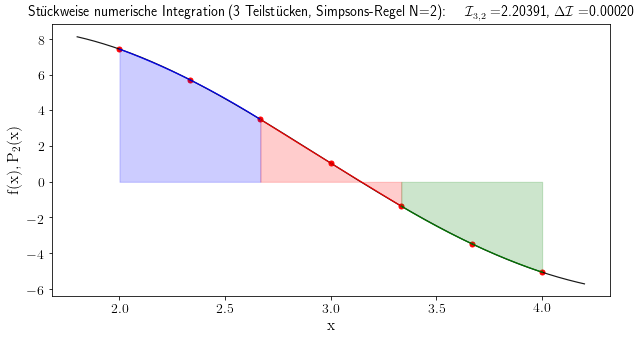

In [61]:
l_width=1.2 
alp=0.9
alp_area=0.2

set_title1 = r'Stückweise numerische Integration (3 Teilstücken, Simpsons-Regel N=2): $\quad {\cal I}_{3,2}=$'+'{0:.5f}'.format(Integral_P_2_Wert_IF)+', $\Delta {\cal I}=$'+'{0:.5f}'.format(Integral_f_Wert.evalf()-Integral_P_2_Wert_IF)
plt.title(set_title1)

plt.xlabel(r"$\rm x$")
plt.ylabel(r"$\rm f(x), P_2(x)$")

plt.plot(x_list,f_lam(x_list), color="black", linewidth=l_width, linestyle='-', alpha=alp, label=r'$\rm f(x)$') 
plt.plot(x_list_0,P_2_0_lam(x_list_0), color="blue", linewidth=l_width, linestyle='-', alpha=alp)
plt.plot(x_list_1,P_2_1_lam(x_list_1), color="red", linewidth=l_width, linestyle='-', alpha=alp)
plt.plot(x_list_2,P_2_2_lam(x_list_2), color="green", linewidth=l_width, linestyle='-', alpha=alp)
plt.scatter(points,f_points, marker='o', color="red", s=25)
plt.fill_between(x_list_0, 0, P_2_0_lam(x_list_0), color="blue", alpha=alp_area)
plt.fill_between(x_list_1, 0, P_2_1_lam(x_list_1), color="red", alpha=alp_area)
plt.fill_between(x_list_2, 0, P_2_2_lam(x_list_2), color="green", alpha=alp_area);